## Analysis 

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE



In [8]:
# Reading the file
file_path = 'adult-all.csv'

# Load the dataset
df = pd.read_csv(file_path)


In [9]:
df

,Age,Role,Income,Degree,Oldest_Child,Marital_Status,Job,Race,Gender,Born
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,Cuba
...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,White,Female,United-States
48838,64,?,321403,HS-grad,9,Widowed,?,Black,Male,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,White,Male,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Asian-Pac-Islander,Male,United-States


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int64 
 1   Role            48842 non-null  object
 2   Income          48842 non-null  int64 
 3   Degree          48842 non-null  object
 4   Oldest_Child    48842 non-null  int64 
 5   Marital_Status  48842 non-null  object
 6   Job             48842 non-null  object
 7   Race            48842 non-null  object
 8   Gender          48842 non-null  object
 9   Born            48842 non-null  object
dtypes: int64(3), object(7)
memory usage: 3.7+ MB


As we can see, there are no missing values in the dataset. But while getting a glimse of the dataset, we found out some values had "?". So they are missing values. 


In [11]:
# Check for '?' in all columns
missing_question_mark = (df == '?').sum()

print(missing_question_mark)


Age                  0
Role              2799
Income               0
Degree               0
Oldest_Child         0
Marital_Status       0
Job               2809
Race                 0
Gender               0
Born               857
dtype: int64


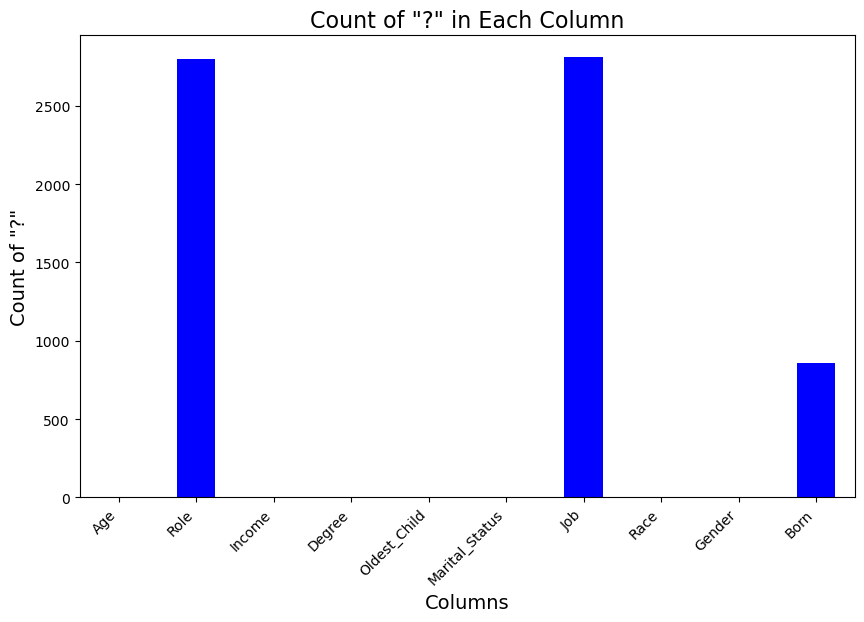

In [12]:
# Count the number of "?" in each column
missing_question_mark = (df == '?').sum()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
missing_question_mark.plot(kind='bar', color='blue')
plt.title('Count of "?" in Each Column', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Count of "?"', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()


As the missing values are in categorical variables, lets replace with "Not available". and keep them as it is

In [13]:
# Replace "?" with "Not available" in the dataframe
df.replace(np.nan, 'Not available', inplace=True)

# Verify if the replacement was successful by checking for the values
missing_after_replacement = (df == 'Not available').sum()
missing_after_replacement

Age               0
Role              0
Income            0
Degree            0
Oldest_Child      0
Marital_Status    0
Job               0
Race              0
Gender            0
Born              0
dtype: int64

There are a total of 214 duplicate values, lets remove them 

In [14]:
# Remove duplicate rows from the dataframe
df_cleaned = df.drop_duplicates()

df_cleaned.duplicated().sum()

0

In [15]:
df_cleaned.describe()

,Age,Income,Oldest_Child
count,48628.000000,4.862800e+04,48628.000000
mean,38.679341,1.897065e+05,10.076993
std,13.705999,1.056691e+05,2.570805
min,17.000000,1.228500e+04,1.000000
25%,28.000000,1.175280e+05,9.000000
50%,37.000000,1.781445e+05,10.000000
75%,48.000000,2.377148e+05,12.000000
max,90.000000,1.490400e+06,16.000000


The summary tells us that the average person in the dataset is around 38 years old, earns about 189,706, and has an oldest child who is around 10 years old. However, there's quite a large variation in income, with some people earning as low as 12,000 and others earning up to 1.49 million.

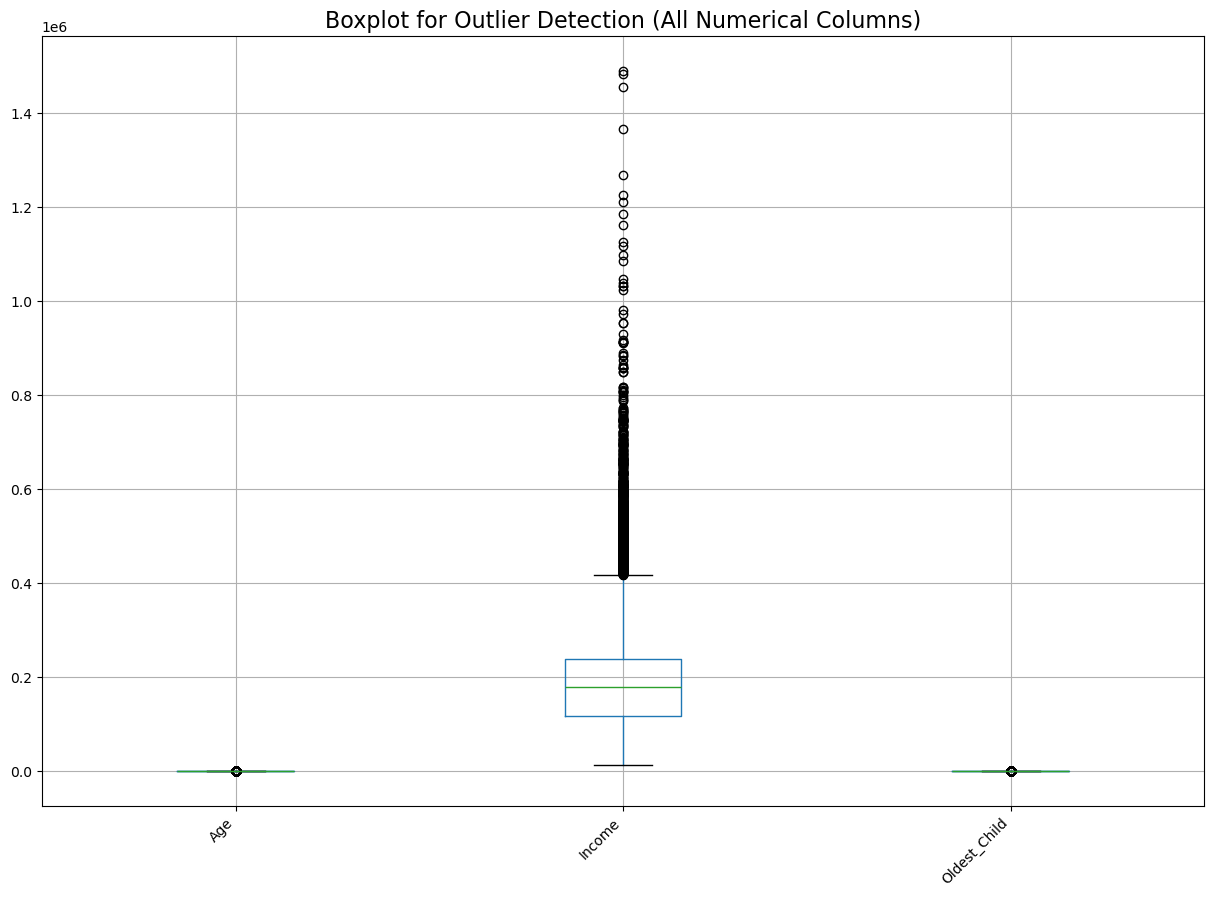

In [16]:
# Select only numerical columns from the dataframe
numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64'])

# Plot boxplots for all numerical columns
plt.figure(figsize=(15, 10))
numerical_columns.boxplot()
plt.title('Boxplot for Outlier Detection (All Numerical Columns)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()


Based on the outlier analysis, it’s clear that Income has a significant number of outliers. However, instead of removing them, we should consider whether these outliers provide meaningful information. Since income can vary significantly based on factors like job, role, and education, these outliers seem to reflect real-world variations and are meaningful. Therefore, we will keep the data as it is.

In [17]:
# Designating a dependent variable based on income threshold of 50K
# Creating a new column 'Income_Category' to separate individuals by income

df_cleaned['Income_Category'] = df_cleaned['Income'].apply(lambda x: 'Low Income' if x <= 50000 else 'High Income')

# Displaying the first few rows to verify the new column
df_cleaned.head()


/var/folders/ct/zh551fgd0tl4qpqj97d4yxb80000gn/T/ipykernel_41690/4131434763.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Income_Category'] = df_cleaned['Income'].apply(lambda x: 'Low Income' if x <= 50000 else 'High Income')


,Age,Role,Income,Degree,Oldest_Child,Marital_Status,Job,Race,Gender,Born,Income_Category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,United-States,High Income
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,United-States,High Income
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,United-States,High Income
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,United-States,High Income
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,Cuba,High Income


Creating new income variables as High or low as Target Variable

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


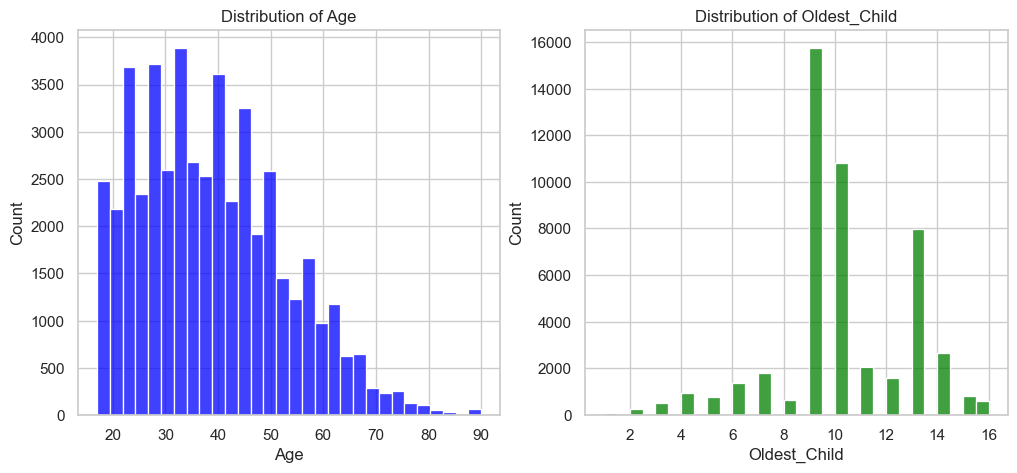

In [18]:

# Setting up the visual style
sns.set(style="whitegrid")

# 1. Histograms for continuous features like 'Age' and 'Oldest_Child'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Age'], kde=False, color='blue', bins=30)
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['Oldest_Child'], kde=False, color='green', bins=30)
plt.title('Distribution of Oldest_Child')
plt.show()



The Age Distribution aligns with a demographic that is primarily working-age individuals, most likely contributing to the economy and having established families. This makes sense given the income and other variables likely associated with this dataset, as working-age individuals are generally the primary earners.

The Oldest Child Distribution provides context on family structure, suggesting that many individuals have children of school-going age, which could influence spending habits, job stability, and income needs. Families with young to pre-teen children may have different financial priorities compared to those without children or with adult children.

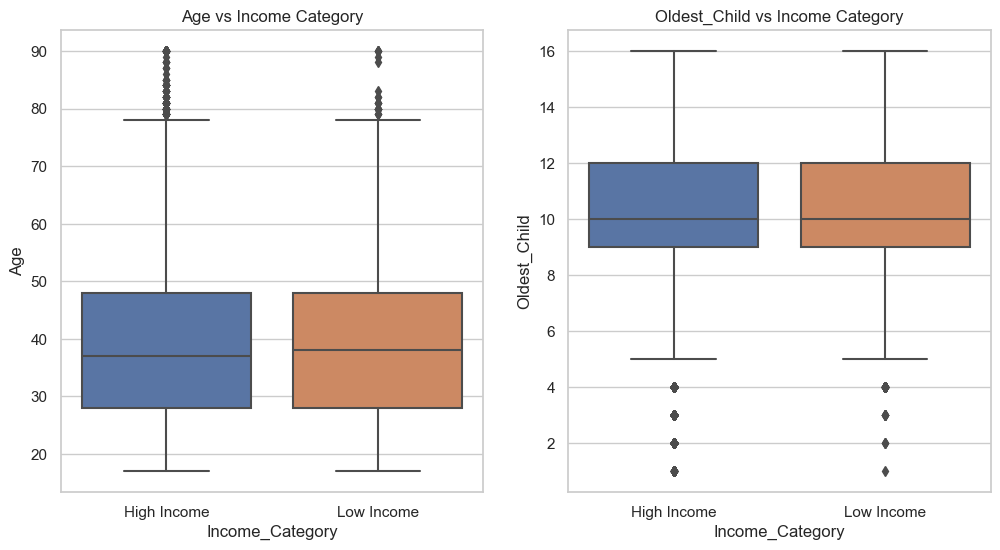

In [19]:
# 2. Box plots to see the relationship of these features with the target variable 'Income_Category_Numeric'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Income_Category', y='Age', data=df_cleaned)
plt.title('Age vs Income Category')

plt.subplot(1, 2, 2)
sns.boxplot(x='Income_Category', y='Oldest_Child', data=df_cleaned)
plt.title('Oldest_Child vs Income Category')
plt.show()


Age is a key factor in income, with individuals in the high-income group typically older, around 40 years, compared to 35 years in the low-income group. More outliers in the high-income group suggest some older individuals continue earning more, likely due to experience or senior roles. The age of the oldest child is similar across both groups (around 10 years), though the low-income group shows more variability, with some having younger children. This suggests that age and experience are more significant in determining income than family structure.

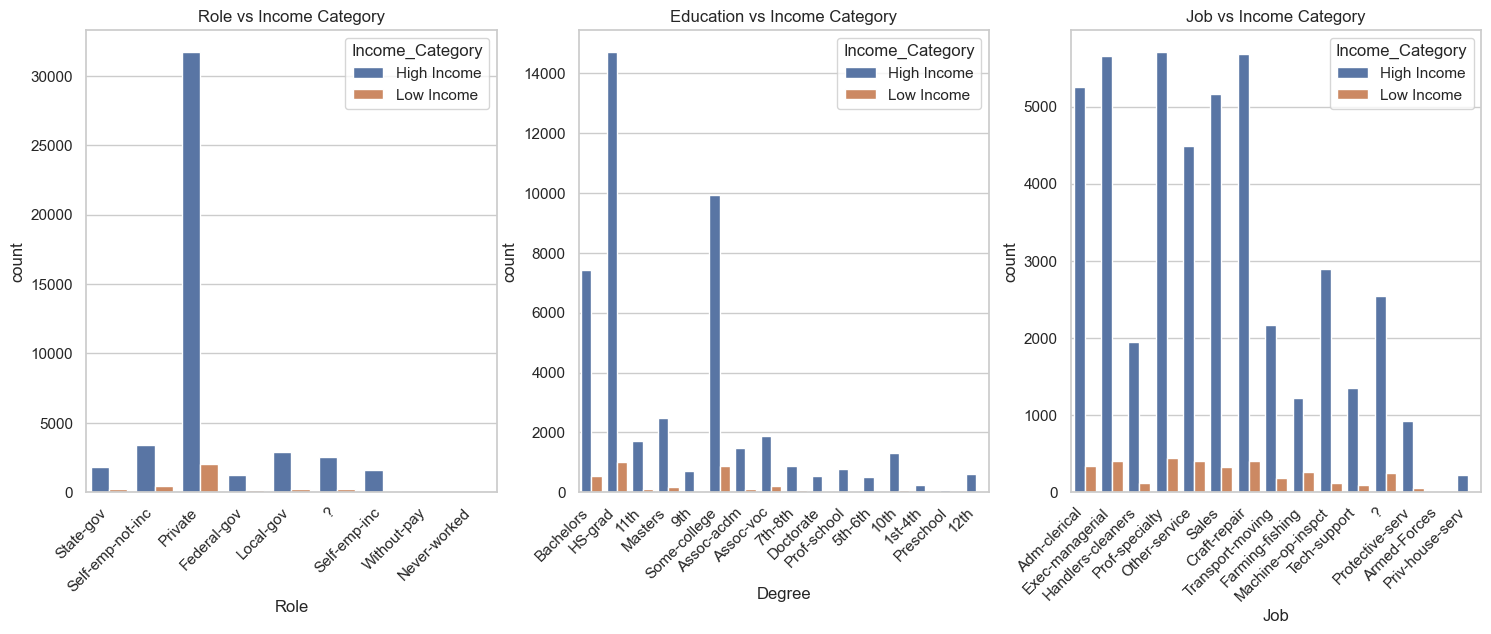

In [20]:
# 2. Count plots for Categorical Variables (Role, Education, Job) vs Target Variable
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.countplot(x='Role', hue='Income_Category', data=df_cleaned)
plt.title('Role vs Income Category')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
sns.countplot(x='Degree', hue='Income_Category', data=df_cleaned)
plt.title('Education vs Income Category')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
sns.countplot(x='Job', hue='Income_Category', data=df_cleaned)
plt.title('Job vs Income Category')
plt.xticks(rotation=45, ha='right')
plt.show()

Overall, the data highlights how education, job roles, and the industry you work in significantly influence your earning potential. Those working in the private sector, especially in managerial or specialized professions, and individuals with advanced degrees, are far more likely to fall into the high-income category. In contrast, lower educational attainment and jobs in service or support roles often lead to more low-income outcomes. This underscores the importance of higher education and career choices in shaping financial success, as these factors open up more opportunities for higher-paying jobs.

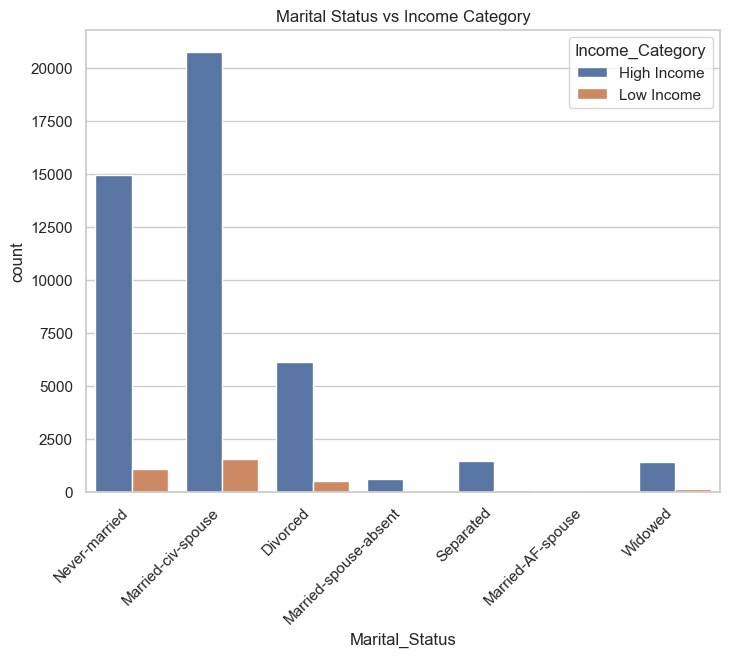

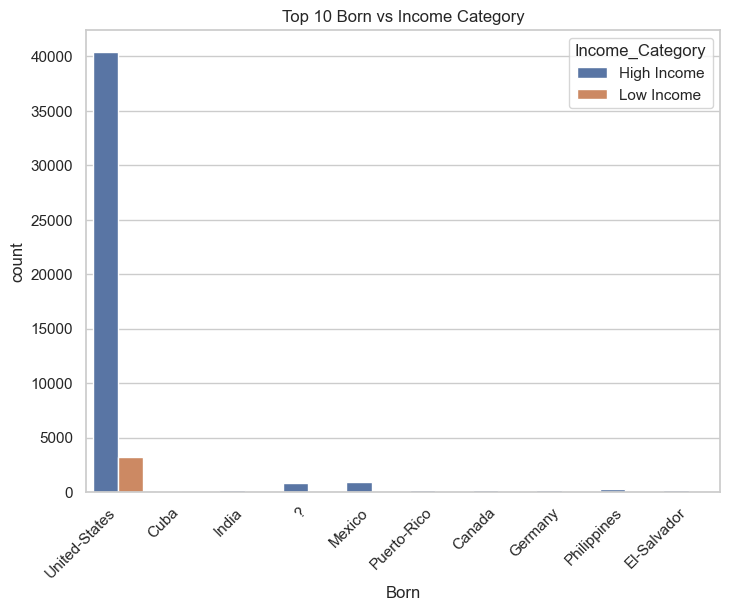

In [21]:
# Additional count plots for 'Marital_Status' and 'Born' vs 'Income_Category'
plt.figure(figsize=(18, 6))

# Plot 1: Marital Status vs Income Category
plt.subplot(1, 2, 1)
sns.countplot(x='Marital_Status', hue='Income_Category', data=df_cleaned)
plt.title('Marital Status vs Income Category')
plt.xticks(rotation=45, ha='right')

# Limiting 'Born' to only the top 10 categories for visualization
top_10_born = df_cleaned['Born'].value_counts().index[:10]
df_born_top_10 = df_cleaned[df_cleaned['Born'].isin(top_10_born)]

# Additional count plots for 'Marital_Status' and 'Born' (Top 10) vs 'Income_Category'
plt.figure(figsize=(18, 6))

# Plot 2: Born (Top 10) vs Income Category
plt.subplot(1, 2, 2)
sns.countplot(x='Born', hue='Income_Category', data=df_born_top_10)
plt.title('Top 10 Born vs Income Category')
plt.xticks(rotation=45, ha='right')

plt.show()

The first plot suggests that being married (particularly in a civilian partnership) is highly associated with earning higher incomes. On the other hand, those who are never married or divorced tend to have a more mixed income distribution, with a notable presence in the low-income group. Other marital statuses have smaller populations but tend to lean towards higher incomes

The second plot suggests that, United States dominates the dataset in terms of birthplace, with most individuals in the high-income category. Cuba stands out as having a more balanced mix of both high- and low-income earners, while other countries like India, Mexico, and Canada have fewer individuals, but they are mostly in the high-income group. This suggests that foreign-born individuals in this dataset, apart from Cuba, are more likely to earn higher incomes, though the sample size for these countries is relatively small.

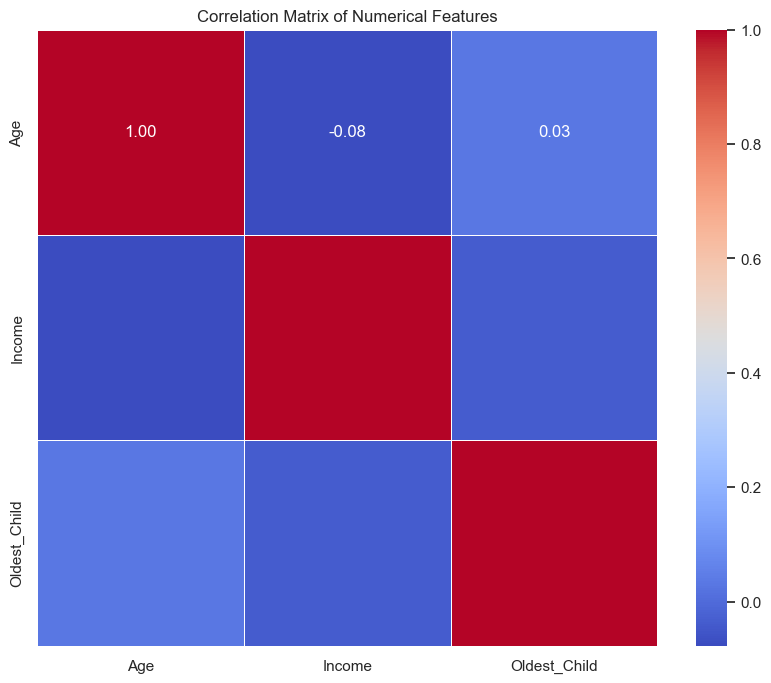

In [22]:
numerical_columns = df_cleaned.select_dtypes(include=['int64', 'float64'])

# Computing the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plotting a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [23]:
#Lets check the skewness of the numerical variables, for that lets divide the data into categorical and numericals first
categorical = ['Role','Degree','Maritial_Status','Job','Race','Gender','Born']

numerical = ['Age','Income', 'Oldest_Child']

In [24]:
df[numerical].skew()


Age             0.557580
Income          1.438892
Oldest_Child   -0.316525
dtype: float64

In [25]:
#Lets handle the skewness of age and oldest child, we dont be doing the same for income as our target variable is derived from income 


# Applying log transformation to 'Age' and 'Oldest_Child' 
df_cleaned['Age_Log'] = np.log(df_cleaned['Age'] + 1)  # Adding 1 to avoid log(0)
df_cleaned['Oldest_Child_Sqrt'] = np.sqrt(df_cleaned['Oldest_Child'])  # Square root transformation

# Checking the skewness after transformation
new_skewness = df_cleaned[['Age_Log', 'Oldest_Child_Sqrt']].skew()

# Display the new skewness values
print(new_skewness)


Age_Log             -0.115662
Oldest_Child_Sqrt   -1.025467
dtype: float64


/var/folders/ct/zh551fgd0tl4qpqj97d4yxb80000gn/T/ipykernel_41690/772016240.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age_Log'] = np.log(df_cleaned['Age'] + 1)  # Adding 1 to avoid log(0)
/var/folders/ct/zh551fgd0tl4qpqj97d4yxb80000gn/T/ipykernel_41690/772016240.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Oldest_Child_Sqrt'] = np.sqrt(df_cleaned['Oldest_Child'])  # Square root transformation


In [26]:
# Convert 'Income_Category' to numeric values (0 and 1)
df_cleaned['Income_Category_Numeric'] = df_cleaned['Income_Category'].apply(lambda x: 1 if x == 'High Income' else 0)

# Verify the conversion by displaying the first few rows
df_cleaned[['Income_Category', 'Income_Category_Numeric']].head()


/var/folders/ct/zh551fgd0tl4qpqj97d4yxb80000gn/T/ipykernel_41690/3528343975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Income_Category_Numeric'] = df_cleaned['Income_Category'].apply(lambda x: 1 if x == 'High Income' else 0)


,Income_Category,Income_Category_Numeric
0,High Income,1
1,High Income,1
2,High Income,1
3,High Income,1
4,High Income,1


In [27]:
# Apply One-Hot Encoding to the categorical columns like 'Occupation' and 'Education'
df_encoded = pd.get_dummies(df_cleaned, columns=['Role','Job','Degree','Marital_Status','Gender','Born','Race'], drop_first=True)

# Display the first few rows to verify encoding
print(df_encoded.head())


   Age  Income  Oldest_Child Income_Category   Age_Log  Oldest_Child_Sqrt  \
0   39   77516            13     High Income  3.688879           3.605551   
1   50   83311            13     High Income  3.931826           3.605551   
2   38  215646             9     High Income  3.663562           3.000000   
3   53  234721             7     High Income  3.988984           2.645751   
4   28  338409            13     High Income  3.367296           3.605551   

   Income_Category_Numeric  Role_Federal-gov  Role_Local-gov  \
0                        1             False           False   
1                        1             False           False   
2                        1             False           False   
3                        1             False           False   
4                        1             False           False   

   Role_Never-worked  ...  Born_Taiwan  Born_Thailand  Born_Trinadad&Tobago  \
0              False  ...        False          False                 Fal

For categorical variables to be used in Modelling we use One Hot Encoding. 

In [28]:
features_to_scale = ['Age', 'Oldest_Child']  # Adjust based on your dataset

# Initializing the scaler
scaler = StandardScaler()

# Applying the scaler to the selected features
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

# Display the first few rows after scaling
print(df_encoded[features_to_scale].head())

        Age  Oldest_Child
0  0.023396      1.137012
1  0.825972      1.137012
2 -0.049566     -0.418936
3  1.044857     -1.196911
4 -0.779181      1.137012


The target variable will be imbalanced. We can use SMOTE techniques to balance the dataset and lets used only required variables for modelling and check if the model is performing well.

In [29]:
# Step 1: One-Hot Encode only the selected categorical variables (Job, Degree)
df_encoded_selected = pd.get_dummies(df_cleaned, columns=['Job', 'Degree'], drop_first=True)

# Step 2: Drop any remaining categorical variables that were not selected for encoding
df_encoded_selected = df_encoded_selected.drop(columns=['Marital_Status', 'Born', 'Race', 'Gender', 'Role'], errors='ignore')

# Step 3: Scale Numerical Variables (Age)
numerical_features = ['Age']
scaler = StandardScaler()

# Applying the scaler only to numerical columns
df_encoded_selected[numerical_features] = scaler.fit_transform(df_encoded_selected[numerical_features])

# Step 4: Prepare the dataset (remove 'Income', 'Income_Category', and 'Income_Category_Numeric' from features)
X = df_encoded_selected.drop(columns=['Income', 'Income_Category', 'Income_Category_Numeric'])  # Features
y = df_encoded_selected['Income_Category_Numeric']  # Target

# Step 5: Split the dataset before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Step 7: Train the KNN model with different values of k
for k in [3, 7, 10]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_balanced, y_train_balanced)
    
    # Step 8: Evaluate the model
    y_pred = knn.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for k={k}: {accuracy:.4f}')
    
    # Confusion Matrix
    print(f'Confusion Matrix for k={k}:\n', confusion_matrix(y_test, y_pred))
    
    # Classification Report
    print(f'Classification Report for k={k}:\n', classification_report(y_test, y_pred))


Accuracy for k=3: 0.8853
Confusion Matrix for k=3:
 [[  38  640]
 [ 476 8572]]
Classification Report for k=3:
               precision    recall  f1-score   support

           0       0.07      0.06      0.06       678
           1       0.93      0.95      0.94      9048

    accuracy                           0.89      9726
   macro avg       0.50      0.50      0.50      9726
weighted avg       0.87      0.89      0.88      9726

Accuracy for k=7: 0.8678
Confusion Matrix for k=7:
 [[  70  608]
 [ 678 8370]]
Classification Report for k=7:
               precision    recall  f1-score   support

           0       0.09      0.10      0.10       678
           1       0.93      0.93      0.93      9048

    accuracy                           0.87      9726
   macro avg       0.51      0.51      0.51      9726
weighted avg       0.87      0.87      0.87      9726

Accuracy for k=10: 0.8362
Confusion Matrix for k=10:
 [[ 114  564]
 [1029 8019]]
Classification Report for k=10:
           

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

for k in [3, 7, 10]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    # Print evaluation metrics
    print(f"\nMetrics for k={k}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Metrics for k=3
Confusion Matrix:
 [[  17  661]
 [ 161 8887]]
Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.03      0.04       678
           1       0.93      0.98      0.96      9048

    accuracy                           0.92      9726
   macro avg       0.51      0.50      0.50      9726
weighted avg       0.87      0.92      0.89      9726


Metrics for k=7
Confusion Matrix:
 [[   1  677]
 [  16 9032]]
Classification Report:
               precision    recall  f1-score   support

           0       0.06      0.00      0.00       678
           1       0.93      1.00      0.96      9048

    accuracy                           0.93      9726
   macro avg       0.49      0.50      0.48      9726
weighted avg       0.87      0.93      0.90      9726


Metrics for k=10
Confusion Matrix:
 [[   2  676]
 [  14 9034]]
Classification Report:
               precision    recall  f1-score   support

           0       0.12      

## Accuracy 
In the KNN model results, we tested with different values of k = 3, 7, 10. The accuracy varied slightly across the models:

k = 3: Accuracy = 0.8853
k = 7: Accuracy = 0.8678
k = 10: Accuracy = 0.8362
The model with k = 3 showed the highest accuracy, followed by k = 7 and k = 10, where accuracy gradually decreased. This suggests that smaller values of k might be better for this dataset because KNN tends to overfit when k is too small, but larger k values might lead to underfitting and reduced accuracy. However, in all cases, the model struggled with identifying class 0 (low-income individuals), indicated by a very low recall and precision for that class. This highlights that while KNN performs well overall (largely due to the majority class), it doesn’t handle the minority class well, even after using SMOTE for balancing.

Should the US Government Use This Model?

Based on the results, I would not recommend using this KNN model for analyzing pay equality. The model's difficulty in correctly identifying low-income individuals means it would give an incomplete or biased view of income distribution. Accurate identification of low-income groups is critical when addressing pay inequality, especially when factoring in gender, race, and education.

Currently, the gender pay gap persists in the US, with women earning roughly 82 cents for every dollar earned by men. The pay gap widens for women of color, and disparities exist across occupations and education levels. While this KNN model incorporates relevant features like education and job roles, it doesn’t capture these complexities well enough to provide reliable insights for policy-making.

To better understand pay inequality, more advanced models like Random Forest or Gradient Boosting should be considered, along with tools for model interpretability to ensure that policymakers can trust the results and make informed decisions.



## Conclusion

From our analysis, we’ve gained valuable insights into how education, job roles, and industries impact income levels. Individuals working in the private sector, particularly in managerial or specialized professional roles, and those with higher education degrees like Master's or Doctorates, are more likely to fall into the high-income category. On the other hand, people in service roles or with lower educational attainment tend to earn less. This highlights the strong connection between career choices, education, and financial success.

When applying the KNN model with SMOTE to balance the class distribution, the model achieved reasonable accuracy, especially with k=3 being the most effective, yielding around 88% accuracy. However, as we increased k to 7 and 10, the model's accuracy dropped, and it struggled even more to correctly predict individuals in the low-income category. This shows that while k=3 provided the best performance, the model still had difficulty identifying lower-income individuals.

Given the imbalanced predictions and the model's limited ability to capture critical information about low-income groups, we wouldn't recommend this approach for the US government to analyze pay equality. The model doesn’t provide reliable insights into income disparities, particularly those affecting lower-income earners, which are key when addressing issues like the gender pay gap or income inequality. A more advanced model that better handles these nuances would be necessary for making informed policy decisions.

## References

Brown, A. (2020). Gender pay gap in U.S. held steady in 2020. Pew Research Center. 

Chawla, N. V., Bowyer, K. W., Hall, L. O., & Kegelmeyer, W. P. (2002). SMOTE: Synthetic minority over-sampling technique. Journal of Artificial Intelligence Research, 16(1), 321-357.

He, H., & Garcia, E. A. (2009). Learning from imbalanced data. IEEE Transactions on Knowledge and Data Engineering, 21(9), 1263-1284.